In [2]:
source(file.path(Sys.getenv("CODEBASE"),"DNAmeth500species/src/00.0_init.R"))
library(plyr)
library(RColorBrewer)
library(pheatmap)


wd = file.path(analysis_dir, "03_motifAnalysis/03.7_AME")
setwd(wd)

Joining, by = "species"



In [4]:
tf_annot <- read.csv("../JASPAR.csv", sep = ";")

In [5]:
head(tf_annot[tf_annot$Species == "Homo sapiens", ])

,ID,Name,Species,Class,Family,Logo,X,X.1,X.2,X.3,X.4,X.5
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,MA0007.2,AR,Homo sapiens,Nuclear receptors with C4 zinc fingers,Steroid hormone receptors (NR3),NA,,,,,,
6,MA0018.1,CREB1,Homo sapiens,Basic leucine zipper factors (bZIP),CREB-related factors,NA,,,,,,
8,MA0018.3,CREB1,Homo sapiens,Basic leucine zipper factors (bZIP),CREB-related factors,NA,,,,,,
9,MA0018.4,CREB1,Homo sapiens,Basic leucine zipper factors (bZIP),CREB-related factors,NA,,,,,,
11,MA0024.1,E2F1,Homo sapiens,Fork head / winged helix factors,E2F-related factors,NA,,,,,,
12,MA0024.2,E2F1,Homo sapiens,Fork head / winged helix factors,E2F-related factors,NA,,,,,,


In [6]:
tf_annot <- unique(tf_annot[tf_annot$Species == "Homo sapiens", c("Name", "Class", "Family")])

In [7]:
NROW(tf_annot)

[1] 638

In [8]:
ans <- read.table("summary/tf_presence.csv")

In [9]:
NROW(ans)

[1] 519

In [10]:
my_tf_annot <- tf_annot %>% filter(Name %in% row.names(ans))

In [11]:
NROW(my_tf_annot)

[1] 440

Expression data: 

In [12]:
tissue_expression <- read.table("../rna_consensus.tsv", sep = "\t", header = 1)

In [13]:
head(tissue_expression)

,Gene,Gene.name,Tissue,NX
,<chr>,<chr>,<chr>,<dbl>
1,ENSG00000000003,TSPAN6,adipose tissue,27.0
2,ENSG00000000003,TSPAN6,adrenal gland,9.8
3,ENSG00000000003,TSPAN6,amygdala,7.0
4,ENSG00000000003,TSPAN6,appendix,4.4
5,ENSG00000000003,TSPAN6,B-cells,0.3
6,ENSG00000000003,TSPAN6,basal ganglia,6.6


In [112]:
setdiff(my_tf_annot$Name, tissue_expression$Gene.name)

[1] "FOSB::JUN"          "FOSL1::JUN"         "FOSL2::JUN"        
 [4] "FOSL2::JUN(var.2)"  "FOS::JUNB"          "FOSB::JUNB"        
 [7] "FOSL1::JUNB"        "FOSL2::JUNB"        "FOS::JUND"         
[10] "FOSL1::JUND"        "FOSL2::JUND"        "FOSL2::JUND(var.2)"
[13] "BHLHA15(var.2)"     "ASCL1(var.2)"       "BHLHE22(var.2)"    
[16] "CEBPG(var.2)"       "GATA1::TAL1"        "JUN::JUNB"         
[19] "HNF4A(var.2)"       "MEIS1(var.2)"       "MEIS2(var.2)"      
[22] "MZF1(var.2)"        "NR1H4::RXRA"        "NR4A2::RXRA"       
[25] "PPARA::RXRA"        "RARA::RXRG"         "NFIX(var.2)"       
[28] "NR2C2(var.2)"       "NR2F1(var.2)"       "POU6F1(var.2)"     
[31] "NEUROG2(var.2)"     "TFAP2A(var.2)"      "TFAP2B(var.2)"     
[34] "TFAP2B(var.3)"      "TFAP2C(var.2)"      "TFAP2C(var.3)"     
[37] "SREBF1(var.2)"      "TFAP2A(var.3)"      "RXRB(var.2)"       
[40] "TCF12(var.2)"

In [14]:
te <- tissue_expression %>% filter(Gene.name  %in% my_tf_annot$Name) %>%
        filter(Tissue %in% c('liver', 'heart muscle'))

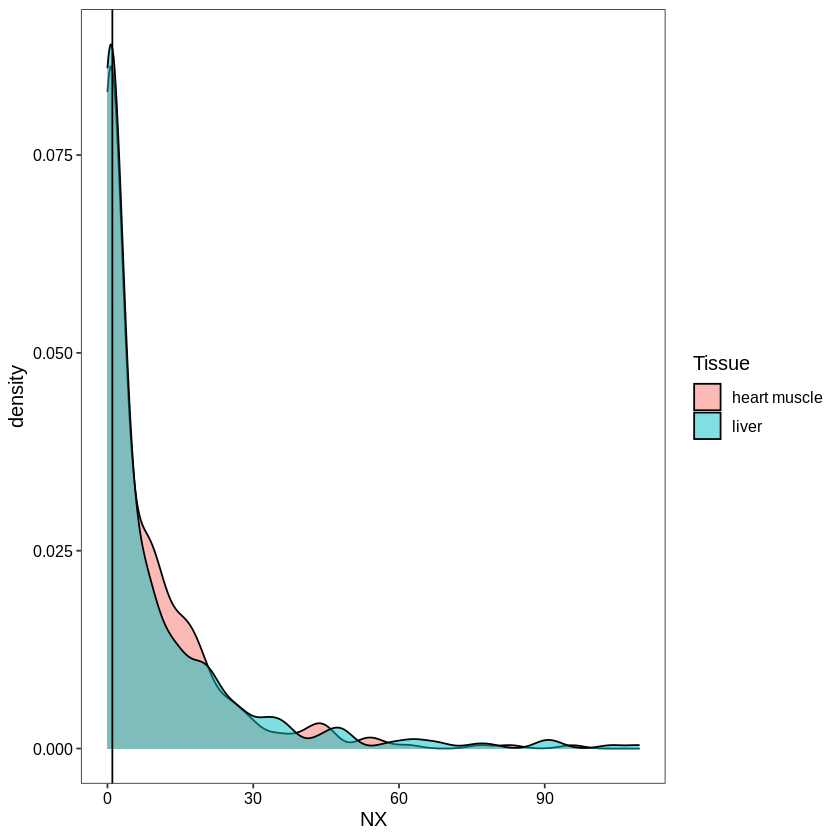

In [15]:
ggplot(te, aes(x = NX, fill = Tissue)) + geom_density(alpha = 0.5) + geom_vline(xintercept = 1)

In [16]:
te_byT <- te %>% spread(Tissue, NX)

In [18]:
colnames(te_byT)[3] <- "heart"

In [19]:
head(te_byT)

,Gene,Gene.name,heart,liver
,<chr>,<chr>,<dbl>,<dbl>
1,ENSG00000005513,SOX8,1.8,1.0
2,ENSG00000006194,ZNF263,14.6,17.1
3,ENSG00000006377,DLX6,0.5,0.3
4,ENSG00000006468,ETV1,18.0,2.0
5,ENSG00000007866,TEAD3,16.9,8.7
6,ENSG00000008196,TFAP2B,0.1,0.0


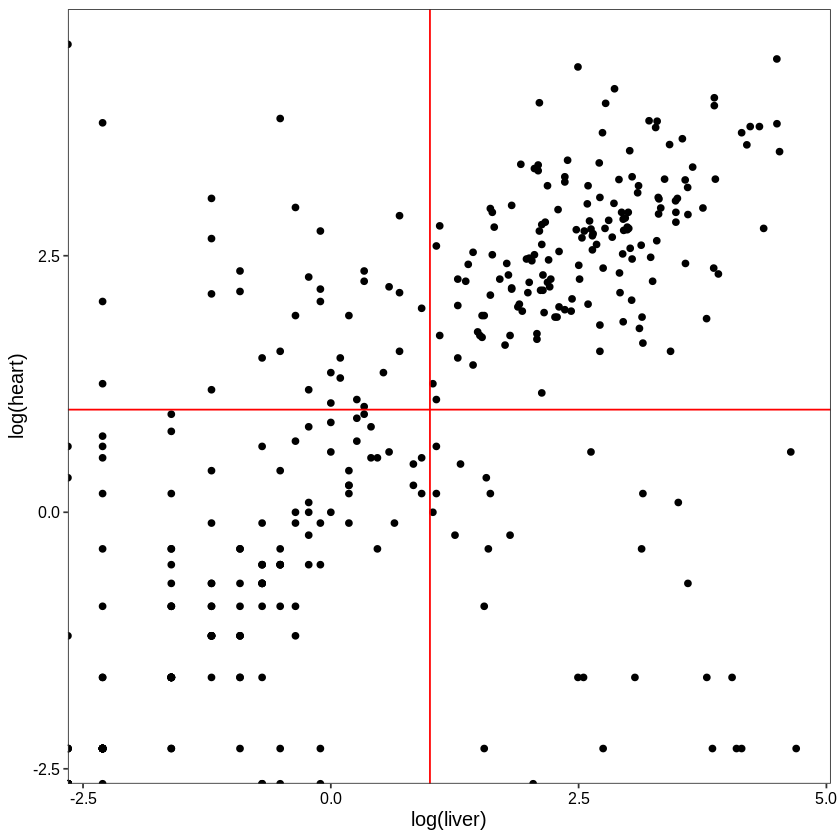

In [20]:
ggplot(te_byT, aes( x=log(liver), y = log(heart))) + geom_point() + 
    geom_vline(xintercept = 1, color = "red") + geom_hline(yintercept = 1, color = "red")

In [21]:
my_tf_annot <- left_join(my_tf_annot, te_byT[, c("Gene.name", "heart", "liver")], by = c("Name"="Gene.name"))

In [22]:
my_tf_annot_expressed <- my_tf_annot %>% 
    filter(liver > 1 | heart > 1)

In [23]:
NROW(filter( my_tf_annot, liver < 1 & heart < 1))

[1] 139

Now, uploading the selex annotation data:

In [25]:
selex <- read.csv("SELEX/annotation_TFs.csv")

In [26]:
my_tf_annot_expressed_w_selex <- left_join(my_tf_annot_expressed, selex)

Joining, by = c("Name", "Class", "Family")



Visulaizing it:

In [27]:
unique(my_tf_annot_expressed_w_selex$Class)

[1] "Tryptophan cluster factors"              
 [2] "Fork head / winged helix factors"        
 [3] "Basic leucine zipper factors (bZIP)"     
 [4] "C2H2 zinc finger factors"                
 [5] "Nuclear receptors with C4 zinc fingers"  
 [6] "Rel homology region (RHR) factors"       
 [7] "Basic helix-loop-helix factors (bHLH)"   
 [8] "DM-type intertwined zinc finger factors" 
 [9] "Homeo domain factors"                    
[10] "T-Box factors"                           
[11] "Other C4 zinc finger-type factors"       
[12] "MADS box factors"                        
[13] "Heat shock factors"                      
[14] "Runt domain factors"                     
[15] "SMAD/NF-1 DNA-binding domain factors"    
[16] "Heteromeric CCAAT-binding factors"       
[17] "High-mobility group (HMG) domain factors"
[18] "TEA domain factors"                      
[19] "STAT domain factors"                     
[20] "C2CH THAP-type zinc finger factors"

In [28]:
NROW(my_tf_annot)

[1] 440

In [29]:
color=c(tissue_colors["L"], "#f7f7f7", tissue_colors["H"])
breaks=c(-2, -1,0,1)

In [30]:
annot_col = as.data.frame(sp_df$color_class)
row.names(annot_col) <- row.names(sp_df)
colnames(annot_col) <- c("class")

In [31]:
annot_row <- my_tf_annot_expressed_w_selex[, c("Name", "Class_short", "Call_upd", "heart", "liver")]
row.names(annot_row) <- annot_row$Name
annot_row <- annot_row[,c(-1)]

In [32]:
df <- read.csv( "classes_color_annot.csv")

In [33]:
Class_idst_col <- setNames(df$Class_idst_col, df$X)

In [34]:
my_tf_annot_expressed_w_selex <- my_tf_annot_expressed_w_selex[order(my_tf_annot_expressed_w_selex$Class_short),]

In [35]:
my_colors <- list(class = class_colors, Class_short = Class_idst_col,
                  liver = colorRampPalette(c("lightblue","red"))(200),
                  heart = colorRampPalette(c("lightblue", "red"))(200),
                  Call_upd = c("MethylPlus" = "red", "MethylMinus" = "#006837", "undefined/unknown" = "grey"))

In [36]:
dev.off()
pdf("summary/final_heatmaps/TFBS_presence_with_expression.pdf", width = 35, height = 12)
pheatmap(t(ans[my_tf_annot_expressed_w_selex$Name, sp_df$species[sp_df$species %in% colnames(ans)]]),
         annotation_row = annot_col, 
         annotation_col = annot_row,
         annotation_color = my_colors,
         show_rownames = F,
         cluster_cols = F, 
         cluster_rows = F,
         color = color, 
         breaks = breaks, 
        fontsize = 5)
dev.off()

null device 
          1

null device 
          1

Now, filter for presence

In [37]:
tf_to_keep <- names(rowSums(abs(ans[my_tf_annot_expressed_w_selex$Name,]))[rowSums(abs(ans[my_tf_annot_expressed_w_selex$Name,])) >= 10])
ans_f <- ans[tf_to_keep,]

In [38]:
sp_to_keep <- names(colSums(abs(ans_f))[colSums(abs(ans_f)) >= 5])
ans_f <- ans_f[,sp_to_keep]

In [39]:
unique(annot_row[row.names(ans_f),]$Class_short)

[1] "C2H2 zinc finger factors"              
[2] "Fork head / winged helix factors"      
[3] "Homeo domain factors"                  
[4] "Nuclear receptors with C4 zinc fingers"
[5] "SMAD/NF-1 DNA-binding domain factors"  
[6] "Tryptophan cluster factors"

In [232]:
my_colors <- list(class = class_colors, Class_short = Class_idst_col[names(Class_idst_col) %in% unique(annot_row[row.names(ans_f),]$Class_short)],
                  liver = colorRampPalette(c("lightblue","red"))(200),
                  heart = colorRampPalette(c("lightblue", "red"))(200),
                  Call_upd = c("MethylPlus" = "red", "MethylMinus" = "#006837", "undefined/unknown" = "grey"))

In [328]:
dev.off()
pdf("summary/final_heatmaps/TFBS_presence_with_expression_filtered.pdf", width = 15, height = 10)
pheatmap(t(ans_f[, sp_df$species[sp_df$species %in% colnames(ans_f)]]),
         annotation_row = annot_col, 
         annotation_col = annot_row,
         annotation_color = my_colors,
         show_rownames = F,
         cluster_cols = T, 
         cluster_rows = F,
         color = color, 
         breaks = breaks, 
        fontsize = 6)
dev.off()

pdf 
  3

pdf 
  3

# Running the GO enrichment

In [40]:
library(topGO)
library(biomaRt)

Loading required package: graph


Attaching package: ‘graph’


The following object is masked from ‘package:plyr’:

    join


The following objects are masked from ‘package:ape’:

    complement, edges


The following object is masked from ‘package:Biostrings’:

    complement


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: GO.db

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select




Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve



groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Attaching package: ‘topGO’


The following object is masked from ‘package:IRanges’:

    members




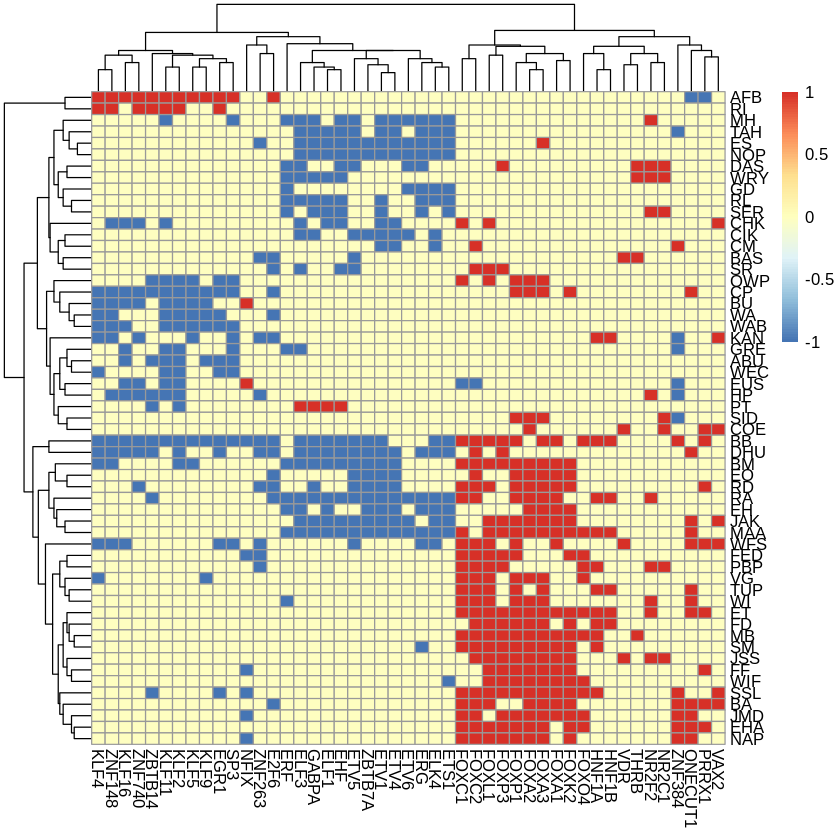

In [41]:
ph <- pheatmap(t(ans_f))

tf_tree <- ph$tree_col

In [87]:
cl <- cutree(tf_tree, k = 2)
df <- as.data.frame(cl)
df$TF <- row.names(df)


Reading in annotations:

In [88]:
df

,cl,TF
,<int>,<chr>
EGR1,1,EGR1
KLF4,1,KLF4
KLF5,1,KLF5
KLF16,1,KLF16
KLF9,1,KLF9
KLF11,1,KLF11
KLF2,1,KLF2
ZNF263,1,ZNF263
SP3,1,SP3


In [89]:
df <- left_join(df, my_tf_annot_expressed_w_selex[, c("Name", "Call_upd", "heart", "liver")], by = c("TF" = "Name"))

In [90]:
head(df)

,cl,TF,Call_upd,heart,liver
,<int>,<chr>,<chr>,<dbl>,<dbl>
1,1,EGR1,undefined/unknown,42.9,68.8
2,1,KLF4,undefined/unknown,18.6,5.1
3,1,KLF5,undefined/unknown,1.3,1.2
4,1,KLF16,MethylPlus,4.8,15.1
5,1,KLF9,undefined/unknown,18.2,36.7
6,1,KLF11,MethylPlus,19.4,27.9


In [329]:
write.table(df, "summary/clusters_and_selex_and_expression.csv", row.names = F, quote = F)

Uploading annotations:

In [46]:
##geneID2Symbol
geneID2Name <- read.table("/scratch/lab_bock/dromanovskaia/resources/NCBI/gene2ID_homo_sapiens", sep=";", fill = F, quote="\"")

colnames(geneID2Name) <- c("id", "symbol")
geneName2ID <- setNames(geneID2Name$id, geneID2Name$symbol)

In [47]:
human = useMart("ensembl", dataset = "hsapiens_gene_ensembl")

In [91]:
df$geneID <- geneName2ID[df$TF]

In [49]:
all_tfs <- tf_annot$Name

In [50]:
all_tfs_id <- geneName2ID[all_tfs] ## the TF universe

In [51]:
###uploading gene2go
if(!file.exists("/scratch/lab_bock/dromanovskaia/resources/NCBI/gene2go_right_format_HS.csv")){
  gene2go <- read.table("/scratch/lab_bock/dromanovskaia/resources/NCBI/geneID2go_homo_sapiens", sep="\t", fill = F, quote="\"")
  colnames(gene2go) <- c("tax_id", "GeneID",	"GO_ID",	"Evidence", "Qualifier",	"GO_term",	"PubMed",	"Category")
  gene2gobygene <- gene2go %>%
    group_by(GeneID) %>%
    summarize(GOS = paste(GO_ID, collapse = ", "))
  write.table(gene2gobygene, "/scratch/lab_bock/dromanovskaia/resources/NCBI/gene2go_right_format_HS.csv", sep = "\t", row.names = F, quote = F)
}

In [52]:
gene2go_list <- readMappings("/scratch/lab_bock/dromanovskaia/resources/NCBI/gene2go_right_format_HS.csv")

In [53]:
outdir = file.path(wd, "GO_update")
dir.create(outdir)

Warning message in dir.create(outdir):
“'/scratch/lab_bock/shared/projects/compEpi/results_analysis/03_motifAnalysis/03.7_AME/GO_update' already exists”


In [54]:
transform <- function(s){
  print(s)
  l <- as.integer(length(s)/2)
  new_s <- paste(c(paste(s[c(1:l)], collapse = " "), paste(s[c((l+1):length(s))], collapse = " ")), collapse = "\n")
  return(new_s)
}

In [100]:
##desining the gene enricment for each cluster
runGOEA <- function(gene_set, NAME, bg_genes = all_tfs_id){
  #gene_set <- geneName2ID[toupper(strsplit(as.character(genes), ", ")[[1]])]
  ##creating gene universe
  geneList <- factor(as.integer(bg_genes %in% gene_set))
  names(geneList) <- bg_genes
  
  ##creating GOdata object
  GOdata <- new("topGOdata", ontology = "BP", allGenes = geneList, 
                annot = annFUN.gene2GO, gene2GO = gene2go_list)
  ##runiing fisher´s test
  resultFisher.elim <- runTest(GOdata, algorithm = "elim", statistic = "fisher")
  df <- as.data.frame(GenTable(GOdata, Fisher = resultFisher.elim))
  dTerm_full <- select(GO.db, keys = df$GO.ID, columns = c("TERM"))
  dTerm_full$TERM_nice <-sapply(dTerm_full$TERM, function(x) {s<-strsplit(x, " ")[[1]]; 
  if(length(s) < 6) {return (x)} else {return (transform(s))}} )
  df <- left_join(df, dTerm_full, by = c("GO.ID" = "GOID"))
  df$Fisher <- as.numeric(df$Fisher)
  df$logP <- -log10(df$Fisher)
  df <- df[order(df$logP, decreasing = F),]
  df$TERM_nice <- factor(df$TERM_nice, levels = df$TERM_nice)
  
  ## getting the TF names:
  AnnotatedGenes = lapply(df$GO.ID, function(x) as.character(unlist(genesInTerm(object = GOdata, whichGO = x))))
  SignificantGenes = lapply(AnnotatedGenes, function(x) intersect(x, gene_set)) # where INT.GENES$V1 is your list of interesting genes
  df["sig_genes"] <- sapply(SignificantGenes, function(x) {gene_name_list <- geneID2Name[geneID2Name$id %in% x,]$symbol; 
                                      return(paste0(gene_name_list, collapse = ";"))})                          
                            
  ggplot(df, aes(x = as.factor(TERM_nice), y = logP)) + geom_bar(stat = "identity") + 
    coord_flip() + labs(y = "-log10(p.Value)", x = "") 
  ggsave(file.path(outdir, paste0(NAME,"_bars.pdf")), width = 8, height = 5)
                            
  write.table(df, 
              file.path(outdir, paste0(NAME,".csv")), quote = F, row.names = F, sep = "\t") 
                            
  pdf(file.path(outdir, paste0(NAME,".pdf")), width = 15, height = 15)
  showSigOfNodes(GOdata, score(resultFisher.elim), firstSigNodes = 5, useInfo = 'all')
  dev.off()
  return(1)
}

In [101]:
runGOEA(df[df$cl == 2,]$geneID, "liver_act_no_filters")
runGOEA(df[df$cl == 1,]$geneID, "heart_act_no_filters")


Building most specific GOs .....

	( 2744 GO terms found. )


Build GO DAG topology ..........

	( 5815 GO terms and 13377 relations. )


Annotating nodes ...............

	( 554 genes annotated to the GO terms. )


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1588 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01


	 Level 18:	1 nodes to be scored	(0 eliminated genes)


	 Level 17:	3 nodes to be scored	(0 eliminated genes)


	 Level 16:	9 nodes to be scored	(0 eliminated genes)


	 Level 15:	15 nodes to be scored	(0 eliminated genes)


	 Level 14:	31 nodes to be scored	(0 eliminated genes)


	 Level 13:	39 nodes to be scored	(0 eliminated genes)


	 Level 12:	68 nodes to be scored	(0 eliminated genes)


	 Level 11:	102 nodes to be scored	(2 eliminated genes)


	 Level 10:	136 nodes to be scored	(9 eliminated genes)


	 Level 9:	184 nodes to be scored	(16 eliminated genes)


	 Level 8:	210 nodes to be scored	(37 eliminated genes)


	 Level 7:	219 n

[1] "regulation"    "of"            "apoptotic"     "process"      
[5] "involved"      "in"            "morphogenesis"
[1] "positive"   "regulation" "of"         "smoothened" "signaling" 
[6] "pathway"   
 [1] "negative"      "regulation"    "of"            "apoptotic"    
 [5] "process"       "involved"      "in"            "outflow"      
 [9] "tract"         "morphogenesis"
[1] "positive"   "regulation" "of"         "cell-cell"  "adhesion"  
[6] "mediated"   "by"         "cadherin"  


[1] 1


Building most specific GOs .....

	( 2744 GO terms found. )


Build GO DAG topology ..........

	( 5815 GO terms and 13377 relations. )


Annotating nodes ...............

	( 554 genes annotated to the GO terms. )


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1058 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01


	 Level 16:	1 nodes to be scored	(0 eliminated genes)


	 Level 15:	2 nodes to be scored	(0 eliminated genes)


	 Level 14:	12 nodes to be scored	(0 eliminated genes)


	 Level 13:	23 nodes to be scored	(0 eliminated genes)


	 Level 12:	35 nodes to be scored	(0 eliminated genes)


	 Level 11:	60 nodes to be scored	(2 eliminated genes)


	 Level 10:	78 nodes to be scored	(2 eliminated genes)


	 Level 9:	102 nodes to be scored	(2 eliminated genes)


	 Level 8:	118 nodes to be scored	(7 eliminated genes)


	 Level 7:	154 nodes to be scored	(13 eliminated genes)


	 Level 6:	163 nodes to be scored	(13 eliminated genes)


	 Level 5:	152 no

[1] "response" "to"       "laminar"  "fluid"    "shear"    "stress"  
[1] "regulation"  "of"          "leukocyte"   "adhesion"    "to"         
[6] "vascular"    "endothelial" "cell"       
[1] "positive"     "regulation"   "of"           "nitric"       "oxide"       
[6] "biosynthetic" "process"     
[1] "cellular" "response" "to"       "laminar"  "fluid"    "shear"    "stress"  


[1] 1

In [102]:
runGOEA(df[df$cl == 2 & df$Call_upd != "MethylPlus",]$geneID, "liver_act_selex_filter")
runGOEA(df[df$cl == 1 & df$Call_upd != "MethylPlus",]$geneID, "heart_act_selex_filter")


Building most specific GOs .....

	( 2744 GO terms found. )


Build GO DAG topology ..........

	( 5815 GO terms and 13377 relations. )


Annotating nodes ...............

	( 554 genes annotated to the GO terms. )


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1545 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01


	 Level 18:	1 nodes to be scored	(0 eliminated genes)


	 Level 17:	3 nodes to be scored	(0 eliminated genes)


	 Level 16:	9 nodes to be scored	(0 eliminated genes)


	 Level 15:	15 nodes to be scored	(0 eliminated genes)


	 Level 14:	29 nodes to be scored	(0 eliminated genes)


	 Level 13:	37 nodes to be scored	(0 eliminated genes)


	 Level 12:	65 nodes to be scored	(0 eliminated genes)


	 Level 11:	95 nodes to be scored	(2 eliminated genes)


	 Level 10:	132 nodes to be scored	(9 eliminated genes)


	 Level 9:	181 nodes to be scored	(16 eliminated genes)


	 Level 8:	204 nodes to be scored	(49 eliminated genes)


	 Level 7:	213 no

[1] "regulation"    "of"            "apoptotic"     "process"      
[5] "involved"      "in"            "morphogenesis"
[1] "positive"   "regulation" "of"         "smoothened" "signaling" 
[6] "pathway"   
 [1] "negative"      "regulation"    "of"            "apoptotic"    
 [5] "process"       "involved"      "in"            "outflow"      
 [9] "tract"         "morphogenesis"
[1] "positive"   "regulation" "of"         "cell-cell"  "adhesion"  
[6] "mediated"   "by"         "cadherin"  


[1] 1


Building most specific GOs .....

	( 2744 GO terms found. )


Build GO DAG topology ..........

	( 5815 GO terms and 13377 relations. )


Annotating nodes ...............

	( 554 genes annotated to the GO terms. )


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1055 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01


	 Level 16:	1 nodes to be scored	(0 eliminated genes)


	 Level 15:	2 nodes to be scored	(0 eliminated genes)


	 Level 14:	12 nodes to be scored	(0 eliminated genes)


	 Level 13:	23 nodes to be scored	(0 eliminated genes)


	 Level 12:	35 nodes to be scored	(0 eliminated genes)


	 Level 11:	60 nodes to be scored	(2 eliminated genes)


	 Level 10:	77 nodes to be scored	(2 eliminated genes)


	 Level 9:	102 nodes to be scored	(2 eliminated genes)


	 Level 8:	117 nodes to be scored	(15 eliminated genes)


	 Level 7:	153 nodes to be scored	(21 eliminated genes)


	 Level 6:	163 nodes to be scored	(21 eliminated genes)


	 Level 5:	152 n

[1] "response" "to"       "laminar"  "fluid"    "shear"    "stress"  
[1] "regulation"  "of"          "leukocyte"   "adhesion"    "to"         
[6] "vascular"    "endothelial" "cell"       
[1] "positive"     "regulation"   "of"           "nitric"       "oxide"       
[6] "biosynthetic" "process"     
[1] "cellular" "response" "to"       "laminar"  "fluid"    "shear"    "stress"  


[1] 1

In [103]:
all_tf_expressed_in_heart <- tissue_expression %>% filter(Gene.name %in% all_tfs) %>% filter(Tissue == "heart muscle") %>% filter(NX > 5) %>% .$Gene.name

In [104]:
open_tf_heart <- df %>% filter(cl ==1 & Call_upd != "MethylPlus" & heart > 5) %>% .$geneID

In [105]:
runGOEA(open_tf_heart, "heart_act_filtered", geneName2ID[all_tf_expressed_in_heart])


Building most specific GOs .....

	( 1875 GO terms found. )


Build GO DAG topology ..........

	( 4679 GO terms and 10725 relations. )


Annotating nodes ...............

	( 255 genes annotated to the GO terms. )


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1018 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01


	 Level 16:	1 nodes to be scored	(0 eliminated genes)


	 Level 15:	2 nodes to be scored	(0 eliminated genes)


	 Level 14:	11 nodes to be scored	(0 eliminated genes)


	 Level 13:	21 nodes to be scored	(0 eliminated genes)


	 Level 12:	35 nodes to be scored	(0 eliminated genes)


	 Level 11:	59 nodes to be scored	(2 eliminated genes)


	 Level 10:	76 nodes to be scored	(2 eliminated genes)


	 Level 9:	99 nodes to be scored	(2 eliminated genes)


	 Level 8:	111 nodes to be scored	(2 eliminated genes)


	 Level 7:	143 nodes to be scored	(2 eliminated genes)


	 Level 6:	157 nodes to be scored	(3 eliminated genes)


	 Level 5:	147 nodes

[1] "response" "to"       "laminar"  "fluid"    "shear"    "stress"  
[1] "regulation"  "of"          "leukocyte"   "adhesion"    "to"         
[6] "vascular"    "endothelial" "cell"       
[1] "regulation"   "of"           "nitric"       "oxide"        "biosynthetic"
[6] "process"     
[1] "positive"     "regulation"   "of"           "nitric"       "oxide"       
[6] "biosynthetic" "process"     
[1] "leukocyte"   "adhesion"    "to"          "vascular"    "endothelial"
[6] "cell"       


[1] 1

In [106]:
all_tf_expressed_in_liver <- tissue_expression %>% filter(Gene.name %in% all_tfs) %>% filter(Tissue == "liver") %>% filter(NX > 5) %>% .$Gene.name

In [107]:
open_tf_liver <- df %>% filter(cl ==2 & Call_upd != "MethylPlus" & liver > 5) %>% .$geneID

In [108]:
runGOEA(open_tf_liver, "liver_act_filtered", geneName2ID[all_tf_expressed_in_liver])


Building most specific GOs .....

	( 1753 GO terms found. )


Build GO DAG topology ..........

	( 4573 GO terms and 10441 relations. )


Annotating nodes ...............

	( 236 genes annotated to the GO terms. )


			 -- Elim Algorithm -- 

		 the algorithm is scoring 878 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01


	 Level 17:	1 nodes to be scored	(0 eliminated genes)


	 Level 16:	4 nodes to be scored	(0 eliminated genes)


	 Level 15:	7 nodes to be scored	(0 eliminated genes)


	 Level 14:	11 nodes to be scored	(0 eliminated genes)


	 Level 13:	19 nodes to be scored	(0 eliminated genes)


	 Level 12:	32 nodes to be scored	(0 eliminated genes)


	 Level 11:	48 nodes to be scored	(0 eliminated genes)


	 Level 10:	63 nodes to be scored	(4 eliminated genes)


	 Level 9:	82 nodes to be scored	(16 eliminated genes)


	 Level 8:	92 nodes to be scored	(16 eliminated genes)


	 Level 7:	114 nodes to be scored	(24 eliminated genes)


	 Level 6:	133 nodes

[1] "positive"   "regulation" "of"         "cell-cell"  "adhesion"  
[6] "mediated"   "by"         "cadherin"  
[1] "negative"    "regulation"  "of"          "epithelial"  "to"         
[6] "mesenchymal" "transition" 


[1] 1

In [339]:
annot_engl <- unique(left_join(sp_df[sp_df$species %in% row.names(ans_sub_sub),], stats_annot[, c("species", "English")]))

Joining, by = "species"



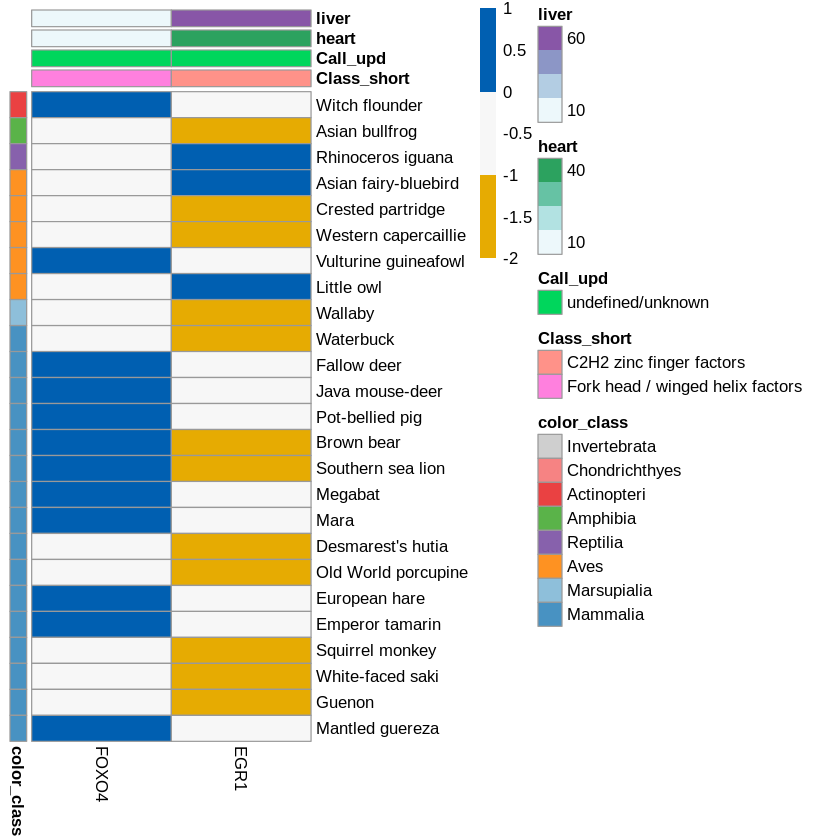

In [358]:
###saving presence of FOXO4  and EGR1 nicely
ans_sub <- as.data.frame(t(ans[c("FOXO4", "EGR1"),]))
ans_sub_sub <- ans_sub[ans_sub$FOXO4!=0 | ans_sub$EGR1!=0, ]
annot <- sp_df[sp_df$species %in% row.names(ans_sub_sub), "color_class", drop = F]
col = list(color_class = class_colors)
#dev.off()
#pdf("summary/final_heatmaps/TFBS_selected_upd.pdf", width = 10, height = 10)
pheatmap(ans_sub_sub[row.names(annot),], 
         cluster_rows = F,
          cluster_cols = F,
          annotation_row = annot,
         annotation_col = annot_row,
         annotation_colors = col,
         labels_row = annot_engl$English, 
         fontsize = 10, annotation_legend = T , breaks = breaks, color = color)
#dev.off()

Warning message in melt(df, measure.vars = c("heart", "liver")):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df). In the next version, this warning will become an error.”


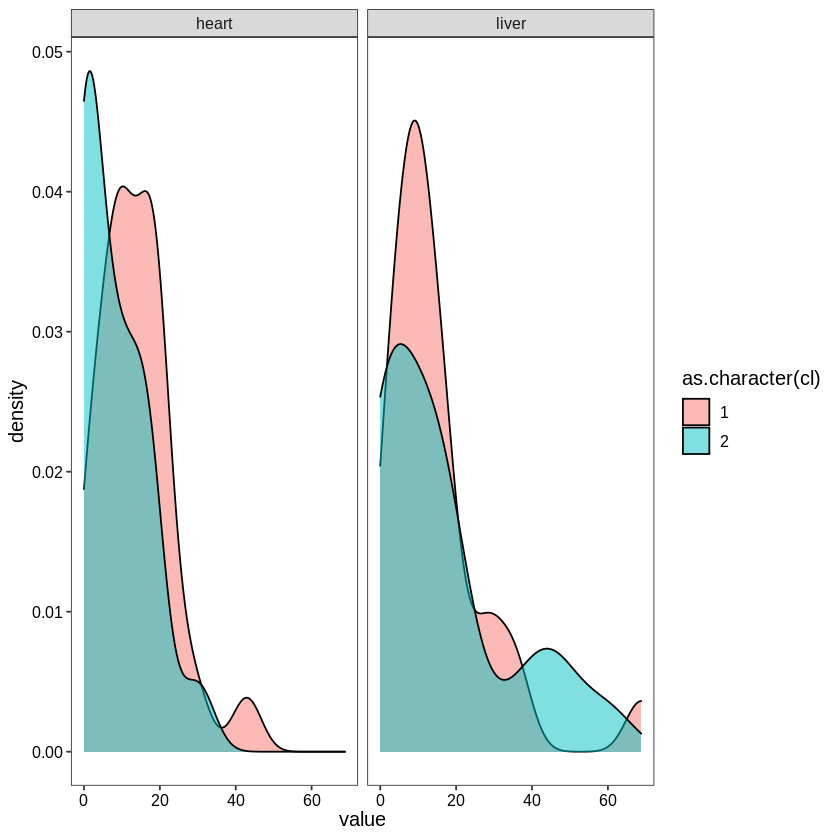

In [326]:
ggplot(melt(df, measure.vars= c("heart", "liver")), aes(x = value, fill = as.character(cl))) + geom_density(alpha = 0.5) + facet_wrap(~variable)

In [323]:
wilcox.test(df[df$cl == 1, ]$heart, df[df$cl == 2, ]$heart)

Warning message in wilcox.test.default(df[df$cl == 1, ]$heart, df[df$cl == 2, ]$heart):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df[df$cl == 1, ]$heart and df[df$cl == 2, ]$heart
W = 381.5, p-value = 0.0169
alternative hypothesis: true location shift is not equal to 0


In [327]:
wilcox.test(df[df$cl == 1, ]$liver, df[df$cl == 2, ]$liver)

Warning message in wilcox.test.default(df[df$cl == 1, ]$liver, df[df$cl == 2, ]$liver):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df[df$cl == 1, ]$liver and df[df$cl == 2, ]$liver
W = 290.5, p-value = 0.6669
alternative hypothesis: true location shift is not equal to 0


From the df generating the nodes/edges for the GRN (shortened):

In [109]:
TF_Target <- read.table("trrust_rawdata.human.tsv")
head(TF_Target)
colnames(TF_Target) <- c("TF", "target", "action", "pmid")

,V1,V2,V3,V4
,<chr>,<chr>,<chr>,<chr>
1,AATF,BAX,Repression,22909821
2,AATF,CDKN1A,Unknown,17157788
3,AATF,KLK3,Unknown,23146908
4,AATF,MYC,Activation,20549547
5,AATF,TP53,Unknown,17157788
6,ABL1,BAX,Activation,11753601


In [110]:
gene_clusters <- df

In [111]:
gene_clusters$active_in <- c("L")
gene_clusters[gene_clusters$cl == 2 & 
                gene_clusters$Call_upd == "MethylPlus",]$active_in <-"H"
gene_clusters[gene_clusters$cl == 1 & 
                gene_clusters$Call_upd != "MethylPlus",]$active_in <- "H"
gene_clusters$TF <- as.character(gene_clusters$TF)

##identifying the targets of the TFs, that are active in heart/liber
H_targets <- unique(TF_Target[TF_Target$TF %in% 
                  gene_clusters[gene_clusters$active_in == "H",]$TF, ]$target)
length(H_targets)

L_targets <- unique(TF_Target[TF_Target$TF %in% 
                  gene_clusters[gene_clusters$active_in == "L",]$TF, ]$target)
length(L_targets)

#all targets combined
all_targets <- union(L_targets, H_targets)

#intersection of targets
common_targets <- intersect(H_targets, L_targets)

##all the genes, that are targeted by any of the transciption factors and their 
##regulators

#edges
sub_tf_t <- TF_Target[TF_Target$TF %in% gene_clusters$TF, c(-4)]

colnames(sub_tf_t) <- c("source", "target", "interaction")
write.table(sub_tf_t, "GRN/edges_full_upd.tsv", 
            sep = "\t", quote = F, row.names = F)

[1] 364

[1] 130

In [113]:
##nodes
nodes <- data.frame(name = unique(union(sub_tf_t$source, sub_tf_t$target)), 
                   action = c("none"))
nodes$action <- as.character(nodes$action)
nodes$name <- as.character(nodes$name)
nodes[nodes$name %in% 
        gene_clusters[gene_clusters$active_in == "H",]$TF, ]$action <- "H"

nodes[nodes$name %in% 
        gene_clusters[gene_clusters$active_in == "L",]$TF, ]$action <- "L"


nodes$role <- c("target")
nodes$role <- as.character(nodes$role)
nodes[nodes$name %in% TF_Target$TF, ]$role <- "TF"

write.table(nodes, "GRN/nodes_full_upd.tsv", 
            sep = "\t", quote = F, row.names = F)

In [148]:
nodes[nodes$name == "KLF2",]

,name,action,role
,<chr>,<chr>,<chr>
29,KLF2,H,TF


In [139]:
##subselecting and filtering - only the common actions and known interactions

sub_tf_s <- sub_tf_t[sub_tf_t$target %in% common_targets,]
sub_tf_s <- sub_tf_s[sub_tf_s$interaction != "Unknown", ]

#dropping ambigous interactions
to_drop_dupl <- as.integer(row.names(sub_tf_s[duplicated(sub_tf_s[, 
                                                  c("source", "target")]),]))
to_drop_dupl <- c(to_drop_dupl - 1, to_drop_dupl)
sub_tf_s <- sub_tf_s[!row.names(sub_tf_s) %in% as.character(to_drop_dupl),]


In [149]:
sub_tf_s$source

[1] "E2F6"   "EGR1"   "EGR1"   "EGR1"   "EGR1"   "EGR1"   "EGR1"   "EGR1"  
 [9] "ERF"    "ERG"    "ETS1"   "ETS1"   "ETS1"   "ETS1"   "ETS1"   "ETV4"  
[17] "ETV4"   "ETV6"   "FOXA1"  "FOXA1"  "FOXA2"  "FOXA2"  "FOXA2"  "FOXA2" 
[25] "FOXO4"  "FOXO4"  "FOXP1"  "FOXP3"  "FOXP3"  "HNF1A"  "KLF16"  "KLF2"  
[33] "KLF4"   "KLF4"   "KLF4"   "KLF4"   "KLF5"   "NFIX"   "NR2F2"  "SP3"   
[41] "SP3"    "SP3"    "SP3"    "SP3"    "SP3"    "ZBTB7A"

In [151]:
nodes_f <- nodes[nodes$name %in% unique(union(sub_tf_s$source, sub_tf_s$target)), ]

In [119]:
head(te_byT)

,Gene,Gene.name,heart,liver
,<chr>,<chr>,<dbl>,<dbl>
1,ENSG00000005513,SOX8,1.8,1.0
2,ENSG00000006194,ZNF263,14.6,17.1
3,ENSG00000006377,DLX6,0.5,0.3
4,ENSG00000006468,ETV1,18.0,2.0
5,ENSG00000007866,TEAD3,16.9,8.7
6,ENSG00000008196,TFAP2B,0.1,0.0


In [121]:
nodes_f_expr <- left_join(nodes_f, te_byT,by = c("name" = "Gene.name"))

In [122]:
setDT(nodes_f_expr)

In [126]:
nodes_f_expr[action=="H" & heart < 5,]

name,action,role,Gene,heart,liver
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
ETV4,H,TF,ENSG00000175832,2.6,1.4
KLF5,H,TF,ENSG00000102554,1.3,1.2


In [125]:
nodes_f_expr[action=="H" & heart < liver,]

name,action,role,Gene,heart,liver
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
EGR1,H,TF,ENSG00000120738,42.9,68.8
ERF,H,TF,ENSG00000105722,21.5,27.2
ETV6,H,TF,ENSG00000139083,6.7,9.6
SP3,H,TF,ENSG00000172845,15.6,19.2
ZBTB7A,H,TF,ENSG00000178951,11.1,12.2


In [130]:
nodes_f_expr[action=="L" & liver > 1,]

name,action,role,Gene,heart,liver
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
FOXA1,L,TF,ENSG00000129514,0.1,47.0
FOXA2,L,TF,ENSG00000125798,0.2,44.4
FOXO4,L,TF,ENSG00000184481,9.7,3.6
FOXP1,L,TF,ENSG00000114861,15.5,12.9
FOXP3,L,TF,ENSG00000049768,0.4,4.7
HNF1A,L,TF,ENSG00000135100,0.1,15.6
KLF16,L,TF,ENSG00000129911,4.8,15.1
NR2F2,L,TF,ENSG00000185551,30.1,15.0


In [128]:
nodes_f_expr[action=="L" & liver < heart,]

name,action,role,Gene,heart,liver
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
FOXL1,L,TF,ENSG00000176678,4.5,0.5
FOXO4,L,TF,ENSG00000184481,9.7,3.6
FOXP1,L,TF,ENSG00000114861,15.5,12.9
NR2F2,L,TF,ENSG00000185551,30.1,15.0
VDR,L,TF,ENSG00000111424,1.5,0.6


In [152]:
nodes_f <- nodes_f[!nodes_f$name %in% nodes_f_expr[action=="L" & liver < 1,]$name, ]

In [153]:
sub_tf_s <- sub_tf_s[! sub_tf_s$source %in% nodes_f_expr[action=="L" & liver < 1,]$name , ]
write.table(sub_tf_s, "GRN/edges_short_upd.tsv", 
            sep = "\t", quote = F, row.names = F)
#nodes_f <- nodes[nodes$name %in% unique(union(sub_tf_s$source, sub_tf_s$target)), ]
write.table(nodes_f, "GRN/nodes_short_upd.tsv", 
            sep = "\t", quote = F, row.names = F)

In [154]:
nodes_f[nodes_f$name == "MYC",]

,name,action,role
,<chr>,<chr>,<chr>
268,MYC,none,TF


In [146]:
sub_tf_s[sub_tf_s$source == "KLF2",]

,source,target,interaction
,<chr>,<chr>,<chr>
3673,KLF2,CDKN1A,Activation
